### Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions

train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of 
Transported for the passengers in this set.

sample_submission.csv - A submission file in the correct format.

- PassengerId - Id for each passenger in the test set.
- Transported - The target. For each passenger, predict either True or False.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#load data

#df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df = pd.read_csv("train.csv")

#df2 = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
df2 = pd.read_csv("test.csv")

#df3 = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
df3 = pd.read_csv("sample_submission.csv")

df




,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [4]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
#First I will fill the age with the mean 

df['Age'] = df['Age'].fillna(value=df["Age"].mean())

df2['Age'] = df2['Age'].fillna(value=df2["Age"].mean())

In [6]:
#Check the mode 

print(df.HomePlanet.value_counts())
print("-------")
print(df.CryoSleep.value_counts())
print("-------")
print(df.Cabin.value_counts())
print("-------")
print(df.Destination.value_counts())
print("-------")
print(df.VIP.value_counts())
print("-------")
print(df.RoomService.value_counts())
print("-------")
print(df.FoodCourt.value_counts())
print("-------")
print(df.ShoppingMall.value_counts())
print("-------")
print(df.VRDeck.value_counts())
print("-------")
print(df.Spa.value_counts())
print("-------")



Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
-------
False    5439
True     3037
Name: CryoSleep, dtype: int64
-------
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
-------
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
-------
False    8291
True      199
Name: VIP, dtype: int64
-------
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64
-------
0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64
-------
0.0       5587
1.0        153
2.0         80
3

In [7]:
#Lets fill the NaN for train and test dataset with the mode
df['HomePlanet'] = df['HomePlanet'].fillna(value="Earth")
df['CryoSleep'] = df['CryoSleep'].fillna(value="False")
df['Cabin'] = df['Cabin'].fillna(value=0.0)
df['Destination'] = df['Destination'].fillna(value="TRAPPIST-1e")
df['VIP'] = df['VIP'].fillna(value="False")
df['RoomService'] = df['RoomService'].fillna(value=0.0)
df['FoodCourt'] = df['FoodCourt'].fillna(value=0.0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(value=0.0)
df['VRDeck'] = df['VRDeck'].fillna(value=0.0)
df['Spa'] = df['Spa'].fillna(value=0.0)
df['Name'] = df['Name'].fillna(method="ffill")


In [8]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [9]:
cols = ["HomePlanet","CryoSleep","Destination","VIP","Transported"]

df[cols] = df[cols].apply(lambda x: pd.factorize(x)[0] + 1)

#df2[cols] = df2[cols].apply(lambda x: pd.factorize(x)[0] + 1)

df["Transported"] = np.where(df.Transported == 1, 0, 1)

df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,1,B/0/P,1,39.0,1,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,2,1,F/0/S,1,24.0,1,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,1,A/0/S,1,58.0,2,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,1,A/0/S,1,33.0,1,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,2,1,F/1/S,1,16.0,1,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,1,A/98/P,3,41.0,2,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,2,2,G/1499/S,2,18.0,1,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,2,1,G/1500/S,1,26.0,1,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,1,1,E/608/S,3,32.0,1,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [10]:
df.drop(["PassengerId","Cabin","Name"], axis=1, inplace=True)



df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,1,1,39.0,1,0.0,0.0,0.0,0.0,0.0,0
1,2,1,1,24.0,1,109.0,9.0,25.0,549.0,44.0,1
2,1,1,1,58.0,2,43.0,3576.0,0.0,6715.0,49.0,0
3,1,1,1,33.0,1,0.0,1283.0,371.0,3329.0,193.0,0
4,2,1,1,16.0,1,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,1,3,41.0,2,0.0,6819.0,0.0,1643.0,74.0,0
8689,2,2,2,18.0,1,0.0,0.0,0.0,0.0,0.0,0
8690,2,1,1,26.0,1,0.0,0.0,1872.0,1.0,0.0,1
8691,1,1,3,32.0,1,0.0,1049.0,0.0,353.0,3235.0,0


In [11]:
round(df.Transported.value_counts()/len(df)*100,2)

1    50.36
0    49.64
Name: Transported, dtype: float64

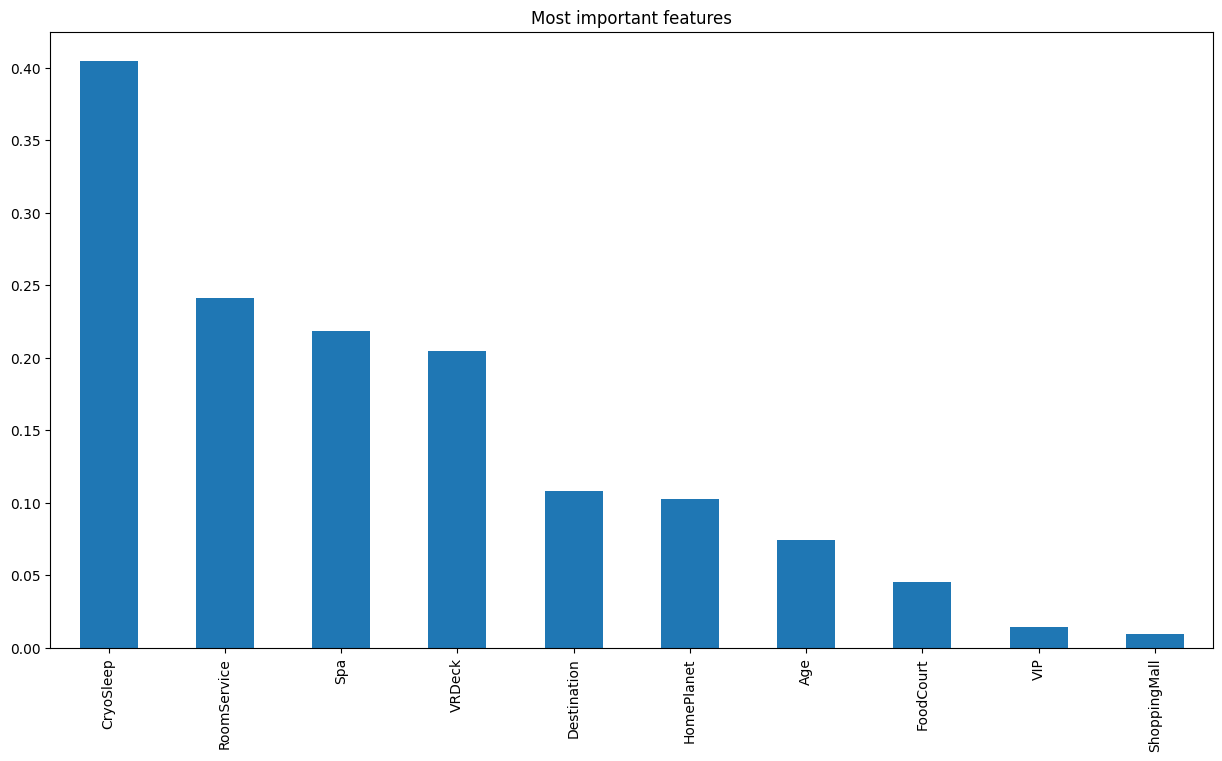

In [12]:
#Let's check the correlation between variables and Fraud 

plt.figure(figsize=(15,8))
d = df.corr()['Transported'][:-1].abs().sort_values(ascending=False).plot(kind='bar', title='Most important features')

plt.show()

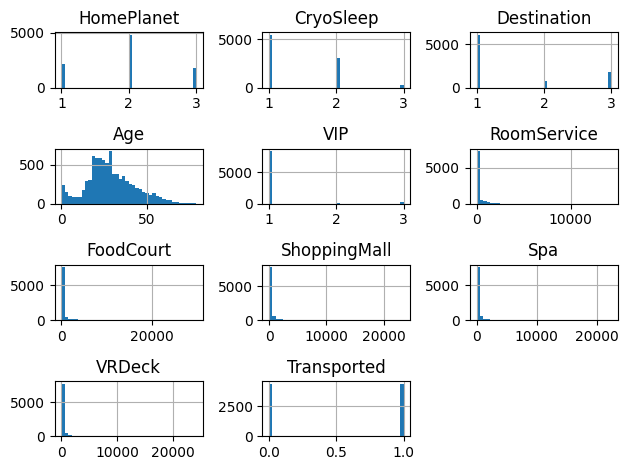

In [13]:
df.hist(bins=40)
plt.tight_layout()

In [14]:
from math import sqrt
import xgboost as xgb                     
from xgboost.sklearn import XGBClassifier 
from xgboost.sklearn import XGBRegressor  
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 12, 8
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
# Train test split 

# Variables x and target y

x = df.drop(["Transported"], axis = 1)
y = df["Transported"]


# Separando entre treinamento e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [16]:
df.dtypes

HomePlanet        int64
CryoSleep         int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

xgb_cl = xgb.XGBClassifier(objective = "binary:logistic"
                        , n_estimators = 200
                        , seed = 1
                        , colsample_bytree = 0.5
                        , learning_rate = 0.2 
                        , max_depth = 3
                        , subsample = 0.8
                        , eta = 0.01
                        , gamma = 1
                        )

In [17]:
# XGB Classifier

xgb_cl = xgb.XGBClassifier(objective = "binary:logistic"
                        , n_estimators = 200
                        , seed = 1
                        , colsample_bytree = 0.5
                        , learning_rate = 0.2 
                        , max_depth = 3
                        , subsample = 0.8
                        , eta = 0.01
                        , gamma = 1
                        )


#acc 80.37, eta 0.01 gamma = 1
#acc 80.48% 

avaliacao = [(x_train, y_train), (x_test, y_test)]

xgb_cl.fit(x_train, y_train, eval_metric = ["auc"], eval_set = avaliacao, verbose = True)
resultados_mod = xgb_cl.evals_result() 

/home/user/.local/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78828	validation_1-auc:0.79799
[1]	validation_0-auc:0.83351	validation_1-auc:0.83559
[2]	validation_0-auc:0.84427	validation_1-auc:0.84087
[3]	validation_0-auc:0.85107	validation_1-auc:0.84809
[4]	validation_0-auc:0.85418	validation_1-auc:0.85227
[5]	validation_0-auc:0.85399	validation_1-auc:0.85456
[6]	validation_0-auc:0.85680	validation_1-auc:0.85627
[7]	validation_0-auc:0.85949	validation_1-auc:0.85916
[8]	validation_0-auc:0.86402	validation_1-auc:0.86188
[9]	validation_0-auc:0.86510	validation_1-auc:0.86319
[10]	validation_0-auc:0.86575	validation_1-auc:0.86282
[11]	validation_0-auc:0.86613	validation_1-auc:0.86349
[12]	validation_0-auc:0.86962	validation_1-auc:0.86629
[13]	validation_0-auc:0.87035	validation_1-auc:0.86745
[14]	validation_0-auc:0.87197	validation_1-auc:0.86831
[15]	validation_0-auc:0.87363	validation_1-auc:0.86866
[16]	validation_0-auc:0.87674	validation_1-auc:0.87008
[17]	validation_0-auc:0.87903	validation_1-auc:0.87120
[18]	validation_0-au

In [18]:
#Predictions 

y_pred_train1 = xgb_cl.predict(x_train)
y_pred_test1 = xgb_cl.predict(x_test)

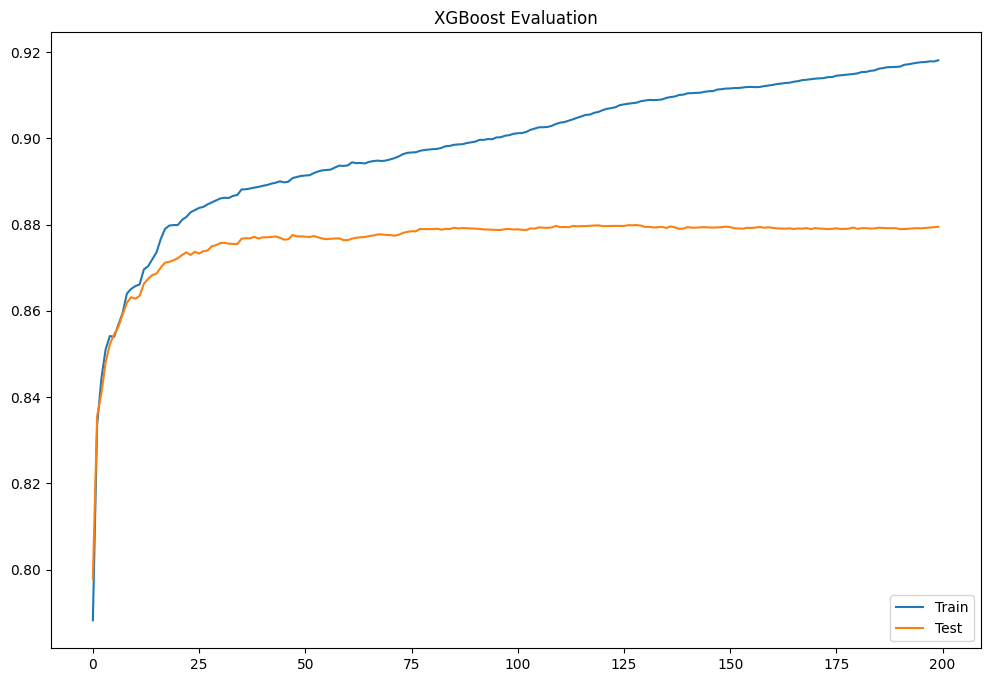

In [19]:
#Checking the evaluation chart, separation between train and test until reaching overfit

x = len(resultados_mod["validation_0"]["auc"])
x_axis = range(0, x)
fig, ax = pyplot.subplots()
ax.plot(x_axis, resultados_mod["validation_0"]["auc"], label = "Train")
ax.plot(x_axis, resultados_mod["validation_1"]["auc"], label = "Test")
plt.title("XGBoost Evaluation");
plt.legend(loc = "lower right");

In [20]:
print("Train")
print("Accuracy: {}%".format(round(accuracy_score(y_train, y_pred_train1)*100, 2)))
print("------------------------------")
print("Test")
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred_test1)*100, 2)))

Train
Accuracy: 82.76%
------------------------------
Test
Accuracy: 80.48%


In [21]:
# Train - overfitted 
print("    TRAIN")
print(confusion_matrix(y_train, y_pred_train1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_train, y_pred_train1))

    TRAIN
[[2395  629]
 [ 420 2641]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3024
           1       0.81      0.86      0.83      3061

    accuracy                           0.83      6085
   macro avg       0.83      0.83      0.83      6085
weighted avg       0.83      0.83      0.83      6085



In [22]:
# Test
print("   TEST")
print(confusion_matrix(y_test, y_pred_test1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test1))

   TEST
[[1000  291]
 [ 218 1099]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1291
           1       0.79      0.83      0.81      1317

    accuracy                           0.80      2608
   macro avg       0.81      0.80      0.80      2608
weighted avg       0.81      0.80      0.80      2608



Lets see what happens if we can increase the accuracy by creating an ensemble model. 

In [23]:
x_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
1454,1,3,3,32.0,1,54.0,3782.0,0.0,21.0,5.0
218,2,2,2,27.0,1,0.0,0.0,0.0,0.0,0.0
7866,2,1,2,24.0,1,86.0,669.0,1.0,0.0,0.0
7622,2,2,1,38.0,1,0.0,0.0,0.0,0.0,0.0
4108,3,1,2,32.0,1,192.0,0.0,441.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1930,2,1,1,13.0,1,12.0,0.0,0.0,0.0,1963.0
7620,2,1,1,25.0,1,11.0,780.0,0.0,0.0,0.0
7503,3,2,1,29.0,1,0.0,0.0,0.0,0.0,0.0
6323,2,2,2,32.0,1,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


import warnings
warnings.filterwarnings("ignore")

In [25]:
# Training the model - Time to fry

mlp1 = MLPClassifier(hidden_layer_sizes = (100,200,100), max_iter = 200,
                    solver = "sgd", verbose = 10, tol = 1e-8, random_state = 42,
                    learning_rate_init = .00005, learning_rate = "adaptive", activation = "tanh")

mlp1.fit(x_train, y_train)

Iteration 1, loss = 0.89075889
Iteration 2, loss = 0.78277683
Iteration 3, loss = 0.70942226
Iteration 4, loss = 0.66292065
Iteration 5, loss = 0.63166281
Iteration 6, loss = 0.60869708
Iteration 7, loss = 0.59011707
Iteration 8, loss = 0.57501531
Iteration 9, loss = 0.56393488
Iteration 10, loss = 0.55527337
Iteration 11, loss = 0.54842831
Iteration 12, loss = 0.54221998
Iteration 13, loss = 0.53696868
Iteration 14, loss = 0.53258574
Iteration 15, loss = 0.52833771
Iteration 16, loss = 0.52481499
Iteration 17, loss = 0.52102265
Iteration 18, loss = 0.51851239
Iteration 19, loss = 0.51642733
Iteration 20, loss = 0.51467338
Iteration 21, loss = 0.51303245
Iteration 22, loss = 0.51159422
Iteration 23, loss = 0.51030130
Iteration 24, loss = 0.50911764
Iteration 25, loss = 0.50802133
Iteration 26, loss = 0.50700403
Iteration 27, loss = 0.50603956
Iteration 28, loss = 0.50515738
Iteration 29, loss = 0.50437778
Iteration 30, loss = 0.50359356
Iteration 31, loss = 0.50292459
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 200, 100),
              learning_rate='adaptive', learning_rate_init=5e-05,
              random_state=42, solver='sgd', tol=1e-08, verbose=10)

In [26]:
#Train test predictions

y_pred_train2 = mlp1.predict(x_train)
y_pred_test2 = mlp1.predict(x_test)

In [27]:
#Training Confusion Matrix
print(" TRAIN")
print(confusion_matrix(y_train, y_pred_train2))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_train, y_pred_train2))

 TRAIN
[[2179  845]
 [ 417 2644]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      3024
           1       0.76      0.86      0.81      3061

    accuracy                           0.79      6085
   macro avg       0.80      0.79      0.79      6085
weighted avg       0.80      0.79      0.79      6085



In [28]:
#Test Confusion Matrix

print(" TEST")
print(confusion_matrix(y_test, y_pred_test2))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test2))

 TEST
[[ 937  354]
 [ 176 1141]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1291
           1       0.76      0.87      0.81      1317

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [29]:
print("Train")
print("Accuracy: {}%".format(round(accuracy_score(y_train, y_pred_train2)*100, 2)))
print("------------------------------")
print("Test")
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred_test2)*100, 2)))

Train
Accuracy: 79.26%
------------------------------
Test
Accuracy: 79.68%


In [30]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

k=1 73.05 (+/- 1.31)
k=2 72.56 (+/- 1.32)
k=3 75.25 (+/- 1.20)
k=4 75.20 (+/- 1.04)
k=5 76.47 (+/- 1.19)
k=6 75.71 (+/- 0.93)
k=7 77.03 (+/- 0.62)
k=8 76.89 (+/- 1.17)
k=9 77.39 (+/- 0.83)
k=10 77.49 (+/- 0.52)
k=11 77.78 (+/- 0.55)
k=12 77.70 (+/- 0.59)
k=13 77.45 (+/- 0.58)
k=14 77.44 (+/- 0.53)
k=15 77.40 (+/- 0.82)
k=16 77.57 (+/- 0.83)
k=17 77.86 (+/- 0.62)
k=18 77.55 (+/- 0.96)
k=19 77.68 (+/- 1.07)
k=20 77.68 (+/- 0.79)
k=21 78.06 (+/- 1.09)
k=22 78.09 (+/- 0.78)
k=23 78.34 (+/- 1.00)
k=24 78.09 (+/- 0.84)
k=25 78.27 (+/- 1.02)
k=26 78.29 (+/- 1.11)
k=27 78.01 (+/- 0.99)
k=28 78.44 (+/- 1.07)
k=29 78.32 (+/- 0.99)
k=30 78.47 (+/- 1.18)
k=31 78.26 (+/- 1.26)
k=32 78.14 (+/- 1.15)
k=33 78.32 (+/- 1.01)
k=34 78.21 (+/- 0.87)
k=35 78.26 (+/- 1.05)
k=36 78.26 (+/- 0.92)
k=37 78.34 (+/- 0.90)
k=38 78.27 (+/- 0.86)
k=39 78.46 (+/- 0.97)
k=40 78.37 (+/- 1.04)
The optimal number of neighbors is 29 with 78.5%


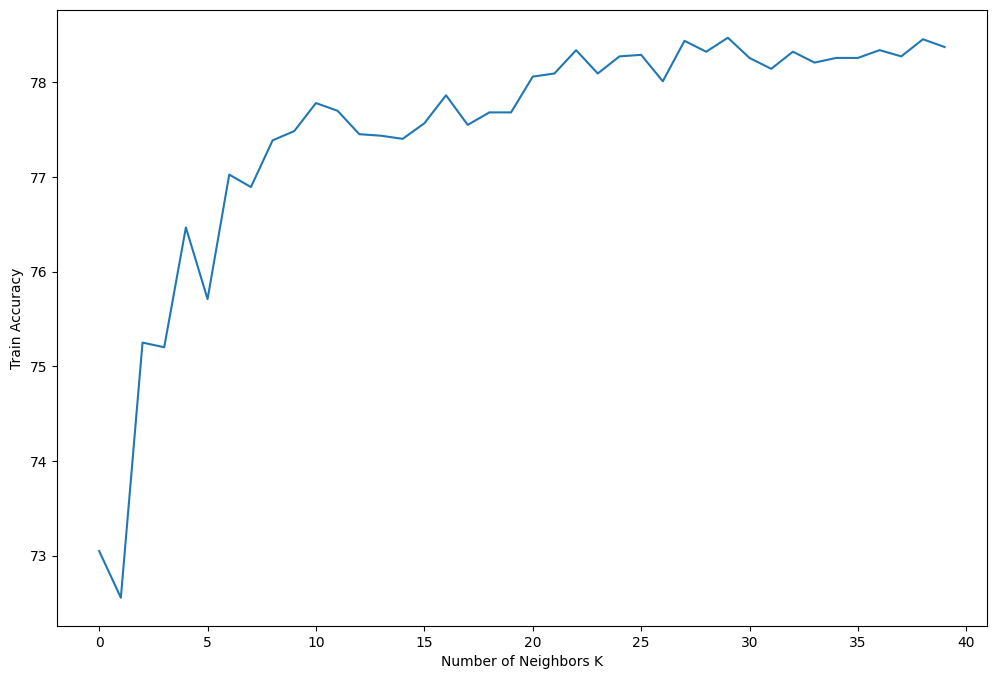

In [31]:
from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')

#Neighbors
neighbors = np.arange(0,40)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=123)
    scores = model_selection.cross_val_score(knn, x_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train, y_train)

knn_pred_train = knn.predict(x_train)
knn_pred_test = knn.predict(x_test)

In [33]:
KNNCV = (cross_val_score(knn, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print('Cross Validation Score:',round((KNNCV), 2)*100)

Cross Validation Score: 78.0


In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("   TRAIN")
print(confusion_matrix(y_train, knn_pred_train))
print()
print("--------------------------------------------------------")
print()
print(classification_report(y_train, knn_pred_train))
print()
print("########################################################")
print()
print("   TEST")
print(confusion_matrix(y_test, knn_pred_test))
print()
print("--------------------------------------------------------")
print()
print(classification_report(y_test, knn_pred_test))

   TRAIN
[[2216  808]
 [ 462 2599]]

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      3024
           1       0.76      0.85      0.80      3061

    accuracy                           0.79      6085
   macro avg       0.80      0.79      0.79      6085
weighted avg       0.79      0.79      0.79      6085


########################################################

   TEST
[[ 951  340]
 [ 188 1129]]

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1291
           1       0.77      0.86      0.81      1317

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [35]:
from sklearn.tree import DecisionTreeClassifier

mod_arvore1 = DecisionTreeClassifier(criterion = "gini", max_depth = 5) #Reducing the tree depth to 5, this will increase the results

mod_arvore1.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [36]:
# Test Predictions

y_pred_train3 = mod_arvore1.predict(x_train)
y_pred_test3 = mod_arvore1.predict(x_test)

In [37]:
print("   TRAIN")
print(confusion_matrix(y_train, y_pred_train3))
print()
print("--------------------------------------------------------")
print()
print(classification_report(y_train, y_pred_train3))
print()
print("########################################################")
print()
print("   TEST")
print(confusion_matrix(y_test, y_pred_test3))
print()
print("--------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test3))

   TRAIN
[[2345  679]
 [ 636 2425]]

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      3024
           1       0.78      0.79      0.79      3061

    accuracy                           0.78      6085
   macro avg       0.78      0.78      0.78      6085
weighted avg       0.78      0.78      0.78      6085


########################################################

   TEST
[[ 980  311]
 [ 269 1048]]

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1291
           1       0.77      0.80      0.78      1317

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [38]:
print("Train")
print("Accuracy: {}%".format(round(accuracy_score(y_train, y_pred_train3)*100, 2)))
print("------------------------------")
print("Test")
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred_test3)*100, 2)))

Train
Accuracy: 78.39%
------------------------------
Test
Accuracy: 77.76%


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

reg_log = sm.GLM(y_train, x_train_, family = sm.families.Binomial())
reg_log = reg_log.fit()

print(reg_log.summary())
print()
print("Parameters: ", reg_log.params)
print("Odds Ratio")
print(np.exp(reg_log.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Transported   No. Observations:                 6085
Model:                            GLM   Df Residuals:                     6074
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2950.0
Date:                Tue, 18 Apr 2023   Deviance:                       5900.0
Time:                        19:05:45   Pearson chi2:                 9.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3408
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6779      0.219     -3.099   

In [40]:
#Predict the values 
y_pred_train = reg_log.predict(x_train_)
y_pred_test = reg_log.predict(x_test_)

#Calculating the ROC and Gini - Training 
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)


print("AUC - Train: %f" % roc_auc_train)
print("Gini - Train: ", round(2*roc_auc_train-1,3))
print()

#Calculating the ROC and Gini - Test 
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Test: %f" % roc_auc_test)
print("Gini - Test: ", round(2*roc_auc_test-1,3))
print()

AUC - Train: 0.848221
Gini - Train:  0.696

AUC - Test: 0.847696
Gini - Test:  0.695



In [41]:
# The point where the True Positive Rate and the False Positive Rate cross
# Where the TPR is high and the FPR is low 

i = np.arange(len(tpr_train))
roc_train = pd.DataFrame({"fpr" : pd.Series(fpr_train, index=i)
                         ,"tpr" : pd.Series(tpr_train, index=i)
                         ,"1-fpr" : pd.Series(1-fpr_train, index=i)
                         ,"tf" : pd.Series(tpr_train - (1-fpr_train), index=i)
                         ,"thresholds" : pd.Series(thresholds_train, index=i)})

print(round(roc_train.loc[(roc_train.tf-0).abs().argsort()[:1]],3))
print()
print("Optimal cutting point : Thresholds")

       fpr    tpr  1-fpr   tf  thresholds
824  0.218  0.782  0.782  0.0        0.57

Optimal cutting point : Thresholds


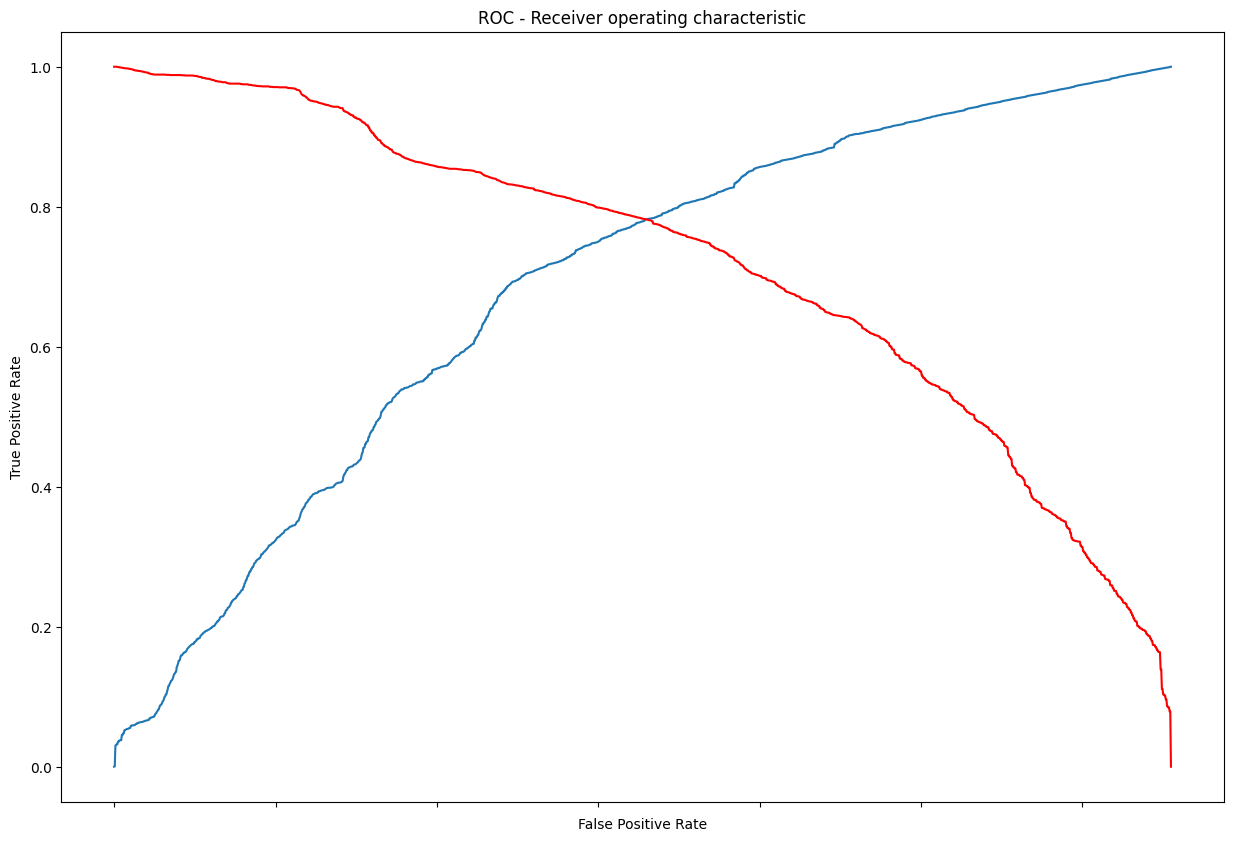

In [42]:
#Plotting ROC(AUC) - Train

fig, ax = plt.subplots()
plt.plot(roc_train["tpr"])
plt.plot(roc_train["1-fpr"], color = "red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Receiver operating characteristic")
ax.set_xticklabels([]);
plt.gcf().set_size_inches(15, 10)

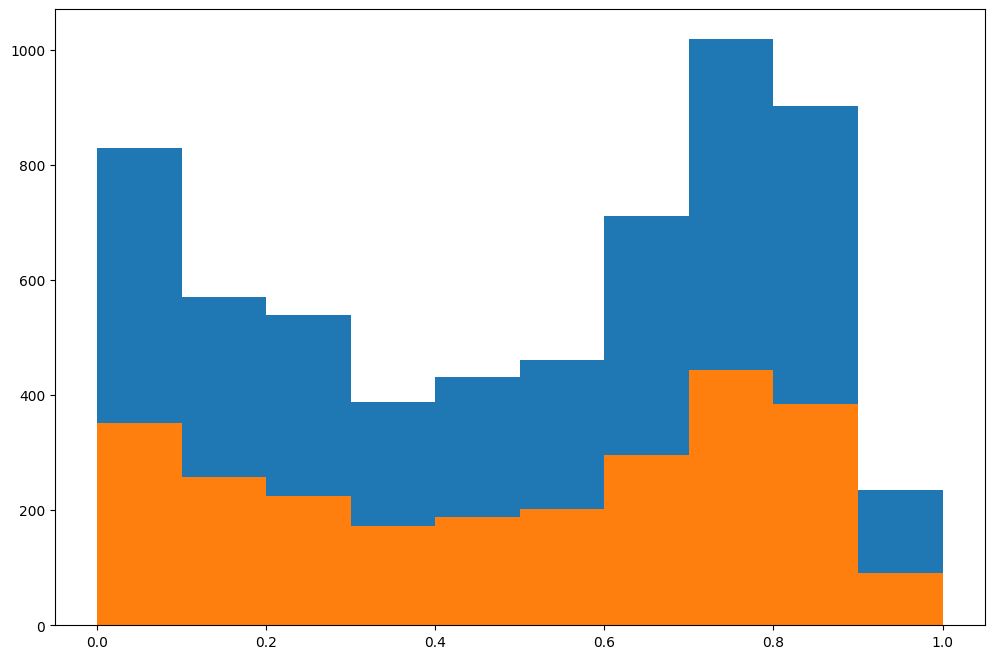

In [43]:
#Adjusting the cutoff 

cutoff = 0.57

plt.hist(y_pred_train)
plt.hist(y_pred_test);

In [44]:
#Pre processing for the cmatrix - data must be binary 

y_pred_train_bin = y_pred_train
y_pred_test_bin = y_pred_test

#Function to transform all prob from train 

for score in range(0,len(y_pred_train-1)):
    if y_pred_train.iloc[score] >= cutoff:
        y_pred_train_bin.iloc[score] = 1
    else:
        y_pred_train_bin.iloc[score] = 0

#Function to transform all prob from test 

for score in range(0,len(y_pred_test-1)):
    if y_pred_test.iloc[score] >= cutoff:
        y_pred_test_bin.iloc[score] = 1
    else:
        y_pred_test_bin.iloc[score] = 0

In [45]:
from sklearn.metrics import classification_report

print("Train Evaluation")
print(confusion_matrix(y_train, y_pred_train_bin))
print(classification_report(y_train,y_pred_train_bin))
print("##############################################")
print()
print("Test Evaluation")
print(confusion_matrix(y_test, y_pred_test_bin))
print(classification_report(y_test,y_pred_test_bin))
print("##############################################")

Train Evaluation
[[2365  659]
 [ 668 2393]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3024
           1       0.78      0.78      0.78      3061

    accuracy                           0.78      6085
   macro avg       0.78      0.78      0.78      6085
weighted avg       0.78      0.78      0.78      6085

##############################################

Test Evaluation
[[1013  278]
 [ 273 1044]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1291
           1       0.79      0.79      0.79      1317

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

##############################################


In [46]:
print("Train")
print("Accuracy: {}%".format(round(accuracy_score(y_train, y_pred_train_bin)*100, 2)))
print("------------------------------")
print("Test")
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred_test_bin)*100, 2)))

Train
Accuracy: 78.19%
------------------------------
Test
Accuracy: 78.87%


In [47]:
##############################################
#ENSEMBLE MODEL 
##############################################

In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [49]:
#Creating multiple models to train

models = [
                ("Emod1", XGBClassifier(objective = "binary:logistic"
                        , n_estimators = 200
                        , seed = 1
                        , colsample_bytree = 0.5
                        , learning_rate = 0.2 
                        , max_depth = 3
                        , subsample = 0.8
                        , eta = 0.01
                        , gamma = 1))
                , ("Emod2", LogisticRegression(random_state = 42))
                , ("Emod3", DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state = 42))
            ]

mod1 = XGBClassifier(objective = "binary:logistic"
                        , n_estimators = 200
                        , seed = 1
                        , colsample_bytree = 0.5
                        , learning_rate = 0.2 
                        , max_depth = 3
                        , subsample = 0.8
                        , eta = 0.01
                        , gamma = 1)

mod2 = LogisticRegression(random_state = 42)
mod3 = DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state = 42)

mod1.fit(x_train, y_train) 
mod2.fit(x_train, y_train) 
mod3.fit(x_train, y_train) 

ensemble_hard = VotingClassifier(models, voting = "hard")
ensemble_soft = VotingClassifier(models, voting = "soft")
ensemble_stacking = StackingClassifier(models, LogisticRegression(random_state = 42), passthrough = False)
ensemble_stacking_pt = StackingClassifier(models, LogisticRegression(random_state = 42), passthrough = True)

ensemble_hard.fit(x_train, y_train)
ensemble_soft.fit(x_train, y_train)
ensemble_stacking.fit(x_train, y_train)
ensemble_stacking_pt.fit(x_train, y_train)

print("Mod1:     {}".format(round(accuracy_score(y_test,mod1.predict(x_test))*100, 2)))
print("Mod2:     {}".format(round(accuracy_score(y_test,mod2.predict(x_test))*100, 2)))
print("Mod3:     {}".format(round(accuracy_score(y_test,mod3.predict(x_test))*100, 2)))
print("Hard Voting: {}".format(round(accuracy_score(y_test,ensemble_hard.predict(x_test))*100, 2)))
print("Soft Voting: {}".format(round(accuracy_score(y_test,ensemble_soft.predict(x_test))*100, 2)))
print("Stacking: {}".format(round(accuracy_score(y_test,ensemble_stacking.predict(x_test))*100, 2)))
print("Stacking - passthrough: {}".format(round(accuracy_score(y_test,ensemble_stacking_pt.predict(x_test))*100, 2)))

Mod1:     80.48
Mod2:     77.8
Mod3:     77.76
Hard Voting: 80.64
Soft Voting: 80.71
Stacking: 80.52
Stacking - passthrough: 80.18


In [58]:
# Stacking Multi layers - 2 Layers

# Layers, simulating a neural network 
layer1 = models
layer2 = [
                 ("Emod4", DecisionTreeClassifier(max_depth = 5, random_state = 42))
                ,("Emod5", RandomForestClassifier(n_estimators = 10, random_state = 42))
                ,("Emod6", KNeighborsClassifier(n_neighbors = 10))
                       ]

ensemble_c2 = StackingClassifier(layer2, final_estimator = LogisticRegression(random_state = 42), passthrough = True)
ensemble_multi = StackingClassifier(layer1, final_estimator = ensemble_c2, passthrough = False)

ensemble_multi.fit(x_train, y_train)

print("Stacking - Multi layer: {}".format(round(accuracy_score(y_test,ensemble_multi.predict(x_test))*100, 2)))


Stacking - Multi layer: 80.87


In [51]:
# Using layers, simulating a neural network 

layer1 = models
layer2 = [
                 ("Emod4", LogisticRegression(random_state = 42))
                ,("Emod5", RandomForestClassifier(n_estimators = 5, random_state = 42))
                ,("Emod6", KNeighborsClassifier(n_neighbors = 5))
                       ]
layer3 = [
                 ("Emod7", LogisticRegression(random_state = 42))
                ,("Emod8", KNeighborsClassifier(n_neighbors = 15))
                ,("Emod9", KNeighborsClassifier(n_neighbors = 5))
                  ]

ensemble_c3 = StackingClassifier(layer3, final_estimator = LogisticRegression(random_state = 42), passthrough = True)
ensemble_c2 = StackingClassifier(layer2, final_estimator = ensemble_c3, passthrough = True)

ensemble_multi3 = StackingClassifier(layer1, final_estimator = ensemble_c2, passthrough = False)

ensemble_multi3.fit(x_train, y_train)

print("Stacking - Multi Layer 3:  {}".format(round(accuracy_score(y_test,ensemble_multi3.predict(x_test))*100, 2)))

Stacking - Multi Layer 3:  80.37


In [52]:
#Report with all the results to understand the stability of the models we tested

print("Mod1 Train:        {}".format(round(accuracy_score(y_train,mod1.predict(x_train))*100, 2)))
print("Mod1 Test:         {}".format(round(accuracy_score(y_test,mod1.predict(x_test))*100, 2)))
print("Train/Test Ratio:  {}".format(round(
    (accuracy_score(y_train,mod1.predict(x_train))/accuracy_score(y_test,mod1.predict(x_test))-1)*100, 2)))

print("")
print("Mod2 Train:        {}".format(round(accuracy_score(y_train,mod2.predict(x_train))*100, 2)))
print("Mod2 Test:         {}".format(round(accuracy_score(y_test,mod2.predict(x_test))*100, 2)))
print("Train/Test Ratio:  {}".format(round(
    (accuracy_score(y_train,mod2.predict(x_train))/accuracy_score(y_test,mod2.predict(x_test))-1)*100, 2)))

print("")
print("Mod3 Train:        {}".format(round(accuracy_score(y_train,mod3.predict(x_train))*100, 2)))
print("Mod3 Test:         {}".format(round(accuracy_score(y_test,mod3.predict(x_test))*100, 2)))
print("Train/Test Ratio:  {}".format(round(
    (accuracy_score(y_train,mod3.predict(x_train))/accuracy_score(y_test,mod3.predict(x_test))-1)*100, 2)))

print("")
print("Hard Voting Train: {}".format(round(accuracy_score(y_train,ensemble_hard.predict(x_train))*100, 2)))
print("Hard Voting Test:  {}".format(round(accuracy_score(y_test,ensemble_hard.predict(x_test))*100, 2)))
print("Train/Test Ratio:  {}".format(round(
    (accuracy_score(y_train,ensemble_hard.predict(x_train))/accuracy_score(y_test,ensemble_hard.predict(x_test))-1)*100, 2)))

print("")
print("Soft Voting Train: {}".format(round(accuracy_score(y_train,ensemble_soft.predict(x_train))*100, 2)))
print("Soft Voting Test:  {}".format(round(accuracy_score(y_test,ensemble_soft.predict(x_test))*100, 2)))
print("Train/Test Ratio:  {}".format(round(
    (accuracy_score(y_train,ensemble_soft.predict(x_train))/accuracy_score(y_test,ensemble_soft.predict(x_test))-1)*100, 2)))

print("")
print("Stacking Train:    {}".format(round(accuracy_score(y_train,ensemble_stacking.predict(x_train))*100, 2)))
print("Stacking Test:     {}".format(round(accuracy_score(y_test,ensemble_stacking.predict(x_test))*100, 2)))
print("Train/Test Ratio:  {}".format(round(
    (accuracy_score(y_train,ensemble_stacking.predict(x_train))/accuracy_score(y_test,ensemble_stacking.predict(x_test))-1)*100, 2)))

print("")
print("Stacking - passthrough Train: {}".format(round(accuracy_score(y_train,ensemble_stacking_pt.predict(x_train))*100, 2)))
print("Stacking - passthrough Test:  {}".format(round(accuracy_score(y_test,ensemble_stacking_pt.predict(x_test))*100, 2)))
print("Train/Test Ratio:  {}".format(round(
    (accuracy_score(y_train,ensemble_stacking_pt.predict(x_train))/accuracy_score(y_test,ensemble_stacking_pt.predict(x_test))-1)*100, 2)))

print("")
print("Stacking - Multi Layer  Train: {}".format(round(accuracy_score(y_train,ensemble_multi.predict(x_train))*100, 2)))
print("Stacking - Multi Layer  Test:  {}".format(round(accuracy_score(y_test,ensemble_multi.predict(x_test))*100, 2)))
print("Train/Test Ratio:  {}".format(round(
    (accuracy_score(y_train,ensemble_multi.predict(x_train))/accuracy_score(y_test,ensemble_multi.predict(x_test))-1)*100, 2)))

print("")
print("Stacking - Multi Layer 3 Train: {}".format(round(accuracy_score(y_train,ensemble_multi3.predict(x_train))*100, 2)))
print("Stacking - Multi Layer 3 Test:  {}".format(round(accuracy_score(y_test,ensemble_multi3.predict(x_test))*100, 2)))
print("Train/Test Ratio:  {}".format(round(
    (accuracy_score(y_train,ensemble_multi3.predict(x_train))/accuracy_score(y_test,ensemble_multi3.predict(x_test))-1)*100, 2)))

Mod1 Train:        82.76
Mod1 Test:         80.48
Train/Test Ratio:  2.83

Mod2 Train:        77.62
Mod2 Test:         77.8
Train/Test Ratio:  -0.23

Mod3 Train:        78.39
Mod3 Test:         77.76
Train/Test Ratio:  0.81

Hard Voting Train: 81.35
Hard Voting Test:  80.64
Train/Test Ratio:  0.88

Soft Voting Train: 81.05
Soft Voting Test:  80.71
Train/Test Ratio:  0.42

Stacking Train:    81.69
Stacking Test:     80.52
Train/Test Ratio:  1.45

Stacking - passthrough Train: 80.46
Stacking - passthrough Test:  80.18
Train/Test Ratio:  0.35

Stacking - Multi Layer  Train: 80.9
Stacking - Multi Layer  Test:  80.87
Train/Test Ratio:  0.05

Stacking - Multi Layer 3 Train: 81.23
Stacking - Multi Layer 3 Test:  80.37
Train/Test Ratio:  1.08


In [74]:
#Pushing model limits, using a voting system using the best models
#Picking the most stable and best accuracy models to use

voter = [("Emod10", ensemble_soft)
        , ("Emod11", ensemble_hard)
        , ("Emod12", ensemble_multi)
        ]

ensemble_stacking_hard = VotingClassifier(voter, voting = "hard")
ensemble_stacking_hard.fit(x_train, y_train)

print("Stacking - Hard Train: {}".format(round(accuracy_score(y_train,ensemble_stacking_hard.predict(x_train))*100, 3)))
print("Stacking - Hard Test:  {}".format(round(accuracy_score(y_test,ensemble_stacking_hard.predict(x_test))*100, 3)))
print("Train / Test Ratio:      {}".format(round(
    (accuracy_score(y_train,ensemble_stacking_hard.predict(x_train))/accuracy_score(y_test,ensemble_stacking_hard.predict(x_test))-1)*100, 2)))

Stacking - Hard Train: 81.101
Stacking - Hard Test:  80.943
Train / Test Ratio:      0.19
